In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import importlib
import sys
import warnings

from dycoreutils import plot_utils as dycoreplt

importlib.reload(dycoreplt)
warnings.filterwarnings('ignore')

In [2]:
expname=[ "L70_bugfix","defaultsponge","sponge5", "sponge5_marshian", "sponge5-marshian_top-taper" ]
basepath="/project/cas/islas/python_savs/dycorediags/preprocessing/TEMdiags/"
plotpath="/web/web-data/staff/islas/verticalres/"

L70_bugfix
defaultsponge
sponge5
sponge5_marshian
sponge5-marshian_top-taper


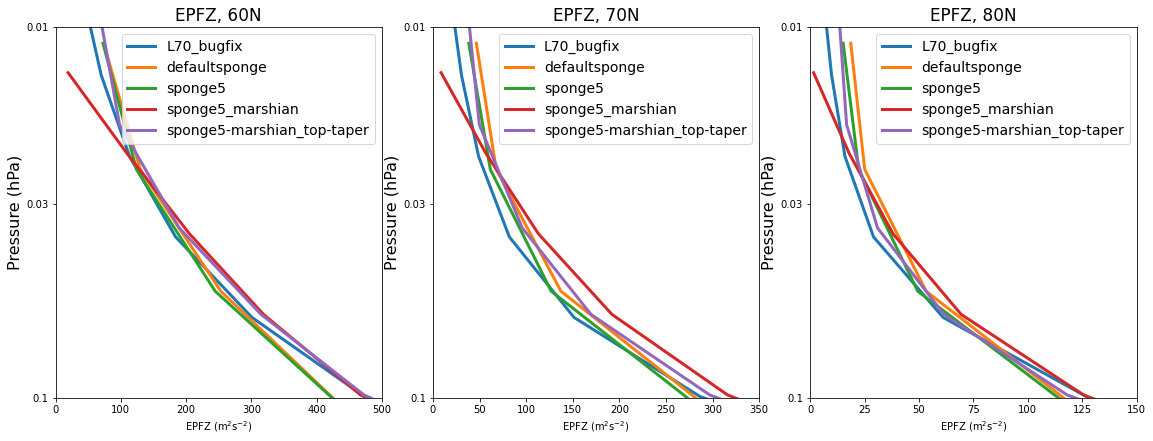

In [3]:
latplot=[60,70,80]
x1=[0.05,0.4,0.75]
x2=[0.3,0.65,1]
xmax=[500,350,150]

fig, ax = plt.subplots(1, 3, figsize=(16,6))
fig.tight_layout(pad=2.0)

countplot=0
for iexp in expname:
    print(iexp)
    fpath=basepath+iexp+".nc"
    dat = xr.open_dataset(fpath, decode_times=True)
    datdjf = dat.where(dat['time.season'] == 'DJF').mean('time')
    
    for ilat in range(0,len(latplot),1):
        if (countplot == 0):
            ax[ilat] = dycoreplt.plotprofile_logp_0p1to0p01(fig, datdjf.epfz.sel(lat=latplot[ilat], method='nearest'), datdjf.pre,iexp,
                                             0.1,0.35,0.7,0.97,title='EPFZ, '+str(latplot[ilat])+'N', xtitle='EPFZ (m$^{2}$s$^{-2}$)', xlim=(0,xmax[ilat]), oplot=True, ax = ax[ilat])
        else:
            ax[ilat] = dycoreplt.plotprofile_logp_0p1to0p01(fig, datdjf.epfz.sel(lat=latplot[ilat], method='nearest'), datdjf.pre, iexp, oplot=True, ax = ax[ilat])
    countplot=countplot+1

for ilat in range(0,len(latplot),1):
    ax[ilat].legend()
    
fig.savefig(plotpath+'epfzprofiles_nh.pdf', facecolor='white', bbox_inches='tight')

L70_bugfix
defaultsponge
sponge5
sponge5_marshian
sponge5-marshian_top-taper


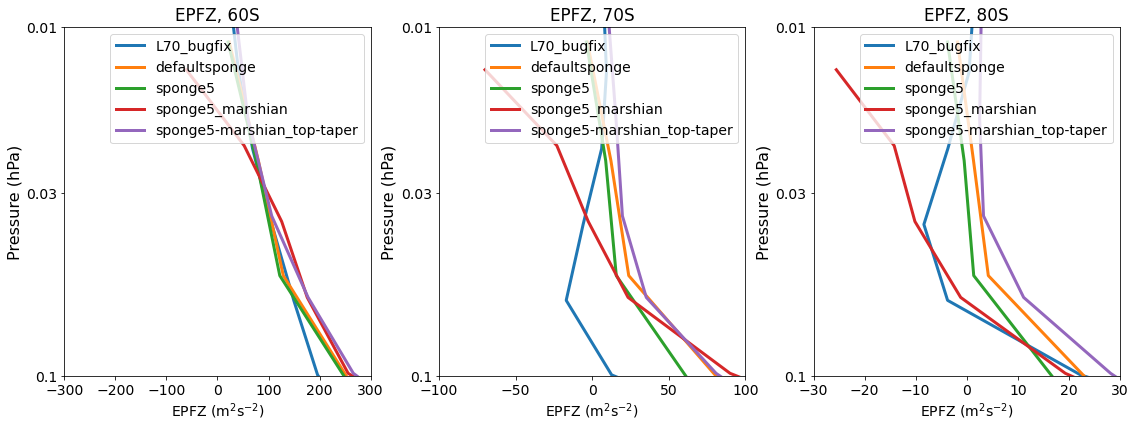

In [6]:
latplot=[-60,-70,-80]
x1=[0.05,0.4,0.75]
x2=[0.3,0.65,1]
xmax=[300,100,30]
xmin=[-300,-100,-30]

fig, ax = plt.subplots(1, 3, figsize=(16,6))
fig.tight_layout(pad=2.0)

countplot=0
for iexp in expname:
    print(iexp)
    fpath=basepath+iexp+".nc"
    dat = xr.open_dataset(fpath, decode_times=True)
    datdjf = dat.where(dat['time.season'] == 'JJA').mean('time')
    
    for ilat in range(0,len(latplot),1):
        if (countplot == 0):
            ax[ilat] = dycoreplt.plotprofile_logp_0p1to0p01(fig, datdjf.epfz.sel(lat=latplot[ilat], method='nearest'), datdjf.pre,iexp,
                                             0.1,0.35,0.7,0.97,title='EPFZ, '+str(np.abs(latplot[ilat]))+'S', xtitle='EPFZ (m$^{2}$s$^{-2}$)', xlim=(xmin[ilat],xmax[ilat]), oplot=True, ax = ax[ilat])
        else:
            ax[ilat] = dycoreplt.plotprofile_logp_0p1to0p01(fig, datdjf.epfz.sel(lat=latplot[ilat], method='nearest'), datdjf.pre, iexp, oplot=True, ax = ax[ilat])
    countplot=countplot+1

for ilat in range(0,len(latplot),1):
    ax[ilat].legend()
    
fig.savefig(plotpath+'epfzprofiles_sh.pdf', facecolor='white', bbox_inches='tight')